In [100]:
import numpy as np
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io
import pickle

from pymir import pd_utils

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

import sys
sys.path.append('../dsc/functions/')

In [101]:
def stratify_dfcol(df, colname, value):
    return pd_utils.select_dfrows(df, [f"$({colname}) == {value}"])

def stratify_dfcols(df, condition_list):
    for (colname, value) in condition_list:
        df = stratify_dfcol(df, colname, value)
    return df

In [102]:
dsc_output = "/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep"

In [103]:
db = os.path.join(dsc_output, os.path.basename(os.path.normpath(dsc_output)) + ".db")
print(db)

/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep/linreg_indep.db


In [104]:
'''
Target can be any module name, group name
or module.variable
There are two groups of methods, one of them 
needs to be force removed during query (groups = ["fit_cpt:"])
'''

target = ["simulate", "simulate.sfix", "simulate.pve", "fit", "mse.err", "simulate.se", "coef_mse.err"]
#condition = ["simulate.sfix == 2", "simulate.signal == 'normal'", "simulate.dims == '(50, 200)'"]
#groups = ["fit_cpt:"]
condition = [""]

In [105]:
qp = dscQP(db, target, condition)
qp_df = qp.output_table
#qp_df
df_gv   = stratify_dfcols(qp_df, [('simulate.sfix', 1), ("simulate.pve", 0.6), ('fit', 'gradvi_compound')])
df_cavi = stratify_dfcols(qp_df, [('simulate.sfix', 1), ("simulate.pve", 0.6), ('fit', 'mr_ash')])

df_gv

,DSC,simulate,simulate.sfix,simulate.se:output,simulate.pve,simulate.output.file,fit,fit.output.file,mse.err:output,coef_mse.err:output
2405,1,equicorrgauss,1,equicorrgauss/equicorrgauss_6,0.6,equicorrgauss/equicorrgauss_6,gradvi_compound,gradvi_compound/equicorrgauss_6_gradvi_compound_1,mse/equicorrgauss_6_gradvi_compound_1_predict_...,NA
2420,2,equicorrgauss,1,equicorrgauss/equicorrgauss_21,0.6,equicorrgauss/equicorrgauss_21,gradvi_compound,gradvi_compound/equicorrgauss_21_gradvi_compou...,mse/equicorrgauss_21_gradvi_compound_1_predict...,NA
2435,3,equicorrgauss,1,equicorrgauss/equicorrgauss_36,0.6,equicorrgauss/equicorrgauss_36,gradvi_compound,gradvi_compound/equicorrgauss_36_gradvi_compou...,mse/equicorrgauss_36_gradvi_compound_1_predict...,NA
2450,4,equicorrgauss,1,equicorrgauss/equicorrgauss_51,0.6,equicorrgauss/equicorrgauss_51,gradvi_compound,gradvi_compound/equicorrgauss_51_gradvi_compou...,mse/equicorrgauss_51_gradvi_compound_1_predict...,NA
2465,5,equicorrgauss,1,equicorrgauss/equicorrgauss_66,0.6,equicorrgauss/equicorrgauss_66,gradvi_compound,gradvi_compound/equicorrgauss_66_gradvi_compou...,mse/equicorrgauss_66_gradvi_compound_1_predict...,NA
2480,6,equicorrgauss,1,equicorrgauss/equicorrgauss_81,0.6,equicorrgauss/equicorrgauss_81,gradvi_compound,gradvi_compound/equicorrgauss_81_gradvi_compou...,mse/equicorrgauss_81_gradvi_compound_1_predict...,NA
2495,7,equicorrgauss,1,equicorrgauss/equicorrgauss_96,0.6,equicorrgauss/equicorrgauss_96,gradvi_compound,gradvi_compound/equicorrgauss_96_gradvi_compou...,mse/equicorrgauss_96_gradvi_compound_1_predict...,NA
2510,8,equicorrgauss,1,equicorrgauss/equicorrgauss_111,0.6,equicorrgauss/equicorrgauss_111,gradvi_compound,gradvi_compound/equicorrgauss_111_gradvi_compo...,mse/equicorrgauss_111_gradvi_compound_1_predic...,NA
2525,9,equicorrgauss,1,equicorrgauss/equicorrgauss_126,0.6,equicorrgauss/equicorrgauss_126,gradvi_compound,gradvi_compound/equicorrgauss_126_gradvi_compo...,mse/equicorrgauss_126_gradvi_compound_1_predic...,NA
2540,10,equicorrgauss,1,equicorrgauss/equicorrgauss_141,0.6,equicorrgauss/equicorrgauss_141,gradvi_compound,gradvi_compound/equicorrgauss_141_gradvi_compo...,mse/equicorrgauss_141_gradvi_compound_1_predic...,NA


In [127]:
idx = 1

In [128]:
df_gv['fit.output.file'].iloc[idx]

'gradvi_compound/equicorrgauss_21_gradvi_compound_1'

In [129]:
df_gv['simulate.output.file'].iloc[idx]

'equicorrgauss/equicorrgauss_21'

In [130]:
df_gv['mse.err:output'].iloc[idx]

'mse/equicorrgauss_21_gradvi_compound_1_predict_linear_1_mse_1'

In [131]:
df_cavi['fit.output.file'].iloc[idx]

mse_gv = dsc_io.load_dsc(os.path.join(dsc_output, f"{df_gv['mse.err:output'].iloc[idx]}.rds"))

mse_gv['err']

0.006417003110395274

In [132]:
_resfile = os.path.join(dsc_output, f"{df_gv['fit.output.file'].iloc[idx]}.pkl")
res = dsc_io.load_dsc(_resfile)

_resfile_cavi = os.path.join(dsc_output, f"{df_cavi['fit.output.file'].iloc[idx]}.rds")
res_cavi = dsc_io.load_dsc(_resfile_cavi)
    
_datafile = os.path.join(dsc_output, f"{df_gv['simulate.output.file'].iloc[idx]}.pkl")
data = dsc_io.load_dsc(_datafile)

In [133]:
res['beta_est']

array([-5.47594726e-09, -7.22650488e-09,  2.03669351e-10, ...,
        8.80410184e-09,  6.38169391e-10, -4.35792412e-09])

In [134]:
res_cavi['beta_est']

array([[-1.37132216e-05],
       [-2.25920798e-05],
       [ 7.68126484e-05],
       ...,
       [ 8.01438893e-05],
       [ 1.45644518e-05],
       [ 8.17674693e-06]])

In [135]:
np.squeeze(res_cavi['beta_est'])

array([-1.37132216e-05, -2.25920798e-05,  7.68126484e-05, ...,
        8.01438893e-05,  1.45644518e-05,  8.17674693e-06])

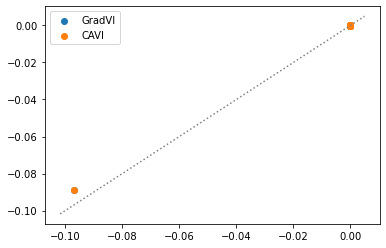

In [136]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['beta'], res['beta_est'], label = 'GradVI')
ax1.scatter(data['beta'], np.squeeze(res_cavi['beta_est']), label = 'CAVI')
mpl_utils.plot_diag(ax1)
ax1.legend()
plt.show()

In [137]:
data.keys()

dict_keys(['X', 'y', 'Xtest', 'ytest', 'n', 'p', 's', 'beta', 'se', 'DSC_DEBUG'])

In [138]:
np.mean(np.square(data['ytest'] - np.dot(data['Xtest'], res['beta_est']) - res['intercept']))

0.006417003110395275

In [139]:
import fit_gradvi
from gradvi.inference import LinearRegression

In [140]:
res_cavi['model']['fit']['sigma2']

0.005789782269593312

In [141]:
res['model']

{'_dj': array([500., 500., 500., ..., 500., 500., 500.]),
 '_init_params': (array([0., 0., 0., ..., 0., 0., 0.]),
  array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
         -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
         -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
         -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]),
  0.0014724179775473531),
 '_invert_method': None,
 '_invert_options': {},
 '_is_debug': False,
 '_is_elbo_calc': False,
 '_is_intercept': True,
 '_method': 'l-bfgs-b',
 '_nclbk': 362,
 '_objtype': 'reparametrize',
 '_opts': {'maxiter': 2000,
  'disp': False,
  'ftol': 1e-09,
  'gtol': 1e-09,
  'maxfun': 20000},
 'coef': array([-5.47594726e-09, -7.22650488e-09,  2.03669351e-10, ...,
         8.80410184e-09,  6.38169391e-10, -4.35792412e-09]),
 'elbo_path': array([ 1.50121696e+04,  1.17179857e+04,  1.10362981e+04,  1.10338192e+04,
         1.09968936e+04,  1.09892885e+04,  1.0972532

In [142]:
prior = fit_gradvi.get_ash_scaled(sparsity = None, ncomp = 20, skbase = 2.0)

In [143]:
gv1 = LinearRegression(debug = True)

In [144]:
prior.sk

array([0.        , 0.03526492, 0.07177346, 0.10956947, 0.14869835,
       0.18920712, 0.23114441, 0.27456063, 0.31950791, 0.36604026,
       0.41421356, 0.4640857 , 0.51571657, 0.5691682 , 0.62450479,
       0.68179283, 0.74110113, 0.80250093, 0.86606598, 0.93187266])

In [145]:
gv1.fit(data['X'], data['y'], prior, s2_init = 1.)
#print(gv1.residual_var)

2022-07-06 10:26:43,903 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:43,904 | gradvi.models.linear_model               | DEBUG   | Residual variance = 1.0
2022-07-06 10:26:44,038 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:44,039 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.9996019222038361
2022-07-06 10:26:44,198 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:44,199 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.9980096110191808
2022-07-06 10:26:44,331 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 1
2022-07-06 10:26:44,334 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Li

2022-07-06 10:26:47,117 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.014717808094033898
2022-07-06 10:26:47,248 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 15
2022-07-06 10:26:47,252 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:47,253 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.014721848332279491
2022-07-06 10:26:47,383 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 16
2022-07-06 10:26:47,387 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:47,388 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.014722373912790706
2022-07-06 10:26:47,525 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 17
2022-07-06 10:26:47,530 | gradvi.mo

2022-07-06 10:26:50,786 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00893759504137544
2022-07-06 10:26:50,886 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 23
2022-07-06 10:26:50,889 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:50,890 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.004410026278065337
2022-07-06 10:26:51,006 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:51,007 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00765462179835638
2022-07-06 10:26:51,138 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 24
2022-07-06 10:26:51,141 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_

2022-07-06 10:26:53,984 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:53,984 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0067816055940472155
2022-07-06 10:26:54,108 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 42
2022-07-06 10:26:54,113 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:54,113 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006759880608452292
2022-07-06 10:26:54,245 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:54,246 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00678156331250357
2022-07-06 10:26:54,365 | gradvi.models.linear_model               | DEBUG   | Calcula

2022-07-06 10:26:57,158 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006785727044909858
2022-07-06 10:26:57,293 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 58
2022-07-06 10:26:57,297 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:57,298 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006770435625699532
2022-07-06 10:26:57,439 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 59
2022-07-06 10:26:57,443 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:26:57,444 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006729423863786853
2022-07-06 10:26:57,580 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 60
2022-07-06 10:26:57,584 | gradvi.mo

2022-07-06 10:27:00,094 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:00,095 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006747611958376835
2022-07-06 10:27:00,218 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:00,219 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006732684823255598
2022-07-06 10:27:00,355 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 77
2022-07-06 10:27:00,359 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:00,359 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006742052824627264
2022-07-06 10:27:00,457 | gradvi.inference.linear_regression       | DEBUG   | Callbac

2022-07-06 10:27:02,911 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006684765822627311
2022-07-06 10:27:03,032 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 95
2022-07-06 10:27:03,036 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:03,037 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006696623525681685
2022-07-06 10:27:03,157 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 96
2022-07-06 10:27:03,161 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:03,162 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0067017460852375876
2022-07-06 10:27:03,290 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 97
2022-07-06 10:27:03,293 | gradvi.m

2022-07-06 10:27:05,597 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006671110101673221
2022-07-06 10:27:05,708 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 113
2022-07-06 10:27:05,711 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:05,712 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00665189016224951
2022-07-06 10:27:05,809 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:05,810 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006661011645978816
2022-07-06 10:27:05,905 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 114
2022-07-06 10:27:05,909 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with a

2022-07-06 10:27:08,103 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006669509156124179
2022-07-06 10:27:08,205 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:08,205 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006669403058362234
2022-07-06 10:27:08,304 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 133
2022-07-06 10:27:08,307 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:08,308 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0066782799142127945
2022-07-06 10:27:08,403 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:08,404 | gradvi.models.linear_model               | DEBUG   | Resid

2022-07-06 10:27:10,729 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006676137247144303
2022-07-06 10:27:10,838 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 151
2022-07-06 10:27:10,841 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:10,842 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00665076457950881
2022-07-06 10:27:10,939 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 152
2022-07-06 10:27:10,942 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:10,942 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0066545152501878094
2022-07-06 10:27:11,039 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 153
2022-07-06 10:27:11,043 | gradvi

2022-07-06 10:27:13,303 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0065456588800741336
2022-07-06 10:27:13,424 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:13,425 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006649206232958601
2022-07-06 10:27:13,518 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 169
2022-07-06 10:27:13,522 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:13,523 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006647336380378617
2022-07-06 10:27:13,619 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 170
2022-07-06 10:27:13,622 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with

2022-07-06 10:27:16,375 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 188
2022-07-06 10:27:16,379 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:16,379 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006641239139870183
2022-07-06 10:27:16,514 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 189
2022-07-06 10:27:16,519 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:16,520 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006666314854272015
2022-07-06 10:27:16,655 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:16,656 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00

2022-07-06 10:27:19,437 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006638573545256415
2022-07-06 10:27:19,571 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:19,572 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006640484319815694
2022-07-06 10:27:19,680 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 207
2022-07-06 10:27:19,683 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:19,684 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.007251830710584736
2022-07-06 10:27:19,790 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:19,791 | gradvi.models.linear_model               | DEBUG   | Residu

2022-07-06 10:27:22,475 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 223
2022-07-06 10:27:22,478 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:22,479 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00662746064231184
2022-07-06 10:27:22,572 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 224
2022-07-06 10:27:22,576 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:22,576 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0066307653981578524
2022-07-06 10:27:22,706 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 225
2022-07-06 10:27:22,710 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2

2022-07-06 10:27:25,469 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:25,470 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006629328404110196
2022-07-06 10:27:25,606 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 243
2022-07-06 10:27:25,610 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:25,610 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006628817167614285
2022-07-06 10:27:25,736 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 244
2022-07-06 10:27:25,742 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:25,742 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.00

2022-07-06 10:27:28,253 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006632203794930804
2022-07-06 10:27:28,381 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 262
2022-07-06 10:27:28,385 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:28,386 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006625322152609067
2022-07-06 10:27:28,483 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 263
2022-07-06 10:27:28,487 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:28,487 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006621170409996491
2022-07-06 10:27:28,584 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 264
2022-07-06 10:27:28,587 | gradvi

2022-07-06 10:27:31,277 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006780021484170228
2022-07-06 10:27:31,374 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:31,375 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.006631029797837699
2022-07-06 10:27:31,488 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 280
2022-07-06 10:27:31,492 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with ash_scaled prior
2022-07-06 10:27:31,493 | gradvi.models.linear_model               | DEBUG   | Residual variance = 0.0066299800764004066
2022-07-06 10:27:31,638 | gradvi.inference.linear_regression       | DEBUG   | Callback iteration 281
2022-07-06 10:27:31,642 | gradvi.models.linear_model               | DEBUG   | Calculating reparametrized Linear Model objective with

In [146]:
gv1.niter

291

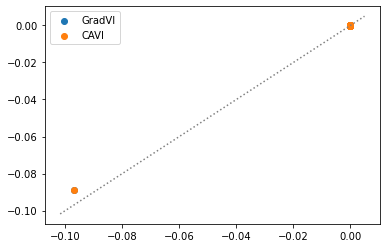

In [147]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data['beta'], gv1.coef, label = 'GradVI')
ax1.scatter(data['beta'], np.squeeze(res_cavi['beta_est']), label = 'CAVI')
ax1.legend()
mpl_utils.plot_diag(ax1)
plt.show()

## Compare DSC result with GradVI result

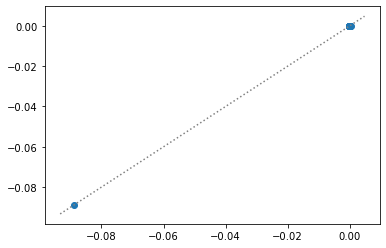

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(gv1.coef, res['beta_est'])
mpl_utils.plot_diag(ax1)
plt.show()

In [149]:
res['model']['prior']

{'smbase': 2.718281828459045,
 'sk': array([0.        , 0.03526492, 0.07177346, 0.10956947, 0.14869835,
        0.18920712, 0.23114441, 0.27456063, 0.31950791, 0.36604026,
        0.41421356, 0.4640857 , 0.51571657, 0.5691682 , 0.62450479,
        0.68179283, 0.74110113, 0.80250093, 0.86606598, 0.93187266]),
 'w': array([9.99999306e-01, 3.54315796e-07, 9.43456734e-08, 4.16160155e-08,
        2.62535905e-08, 1.98261151e-08, 1.64713080e-08, 1.44588874e-08,
        1.31367735e-08, 1.22137780e-08, 1.15406810e-08, 1.10320434e-08,
        1.06352909e-08, 1.03167452e-08, 1.00542837e-08, 9.83316637e-09,
        9.64383705e-09, 9.48061936e-09, 9.33956072e-09, 9.21198087e-09]),
 'wmod': array([13.9883662 , -0.86471035, -2.18793353, -3.00641386, -3.46709618,
        -3.74789893, -3.93327899, -4.06358968, -4.15948351, -4.23233428,
        -4.28902068, -4.33409487, -4.37072114, -4.40113063, -4.42690016,
        -4.44913795, -4.46857988, -4.4856493 , -4.50063972, -4.51439404]),
 'w_init': array([0.0

In [150]:
for key, value in res['model'].items():
    print("========")
    print(key, ":")
    #print ()
    print ('GradVI:', getattr(gv1, key))
    #print ()
    print ('DSC:   ', value)

_dj :
GradVI: [500. 500. 500. ... 500. 500. 500.]
DSC:    [500. 500. 500. ... 500. 500. 500.]
_init_params :
GradVI: (array([0., 0., 0., ..., 0., 0., 0.]), array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]), 1.0)
DSC:    (array([0., 0., 0., ..., 0., 0., 0.]), array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
       -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]), 0.0014724179775473531)
_invert_method :
GradVI: None
DSC:    None
_invert_options :
GradVI: {}
DSC:    {}
_is_debug :
GradVI: True
DSC:    False
_is_elbo_calc :
GradVI: False
DSC:    False
_is_intercept :
GradVI:

In [151]:
for key, value in res['model']['prior'].items():
    print(key)
    print (getattr(gv1.prior, key))
    print (value)

smbase
2.718281828459045
2.718281828459045
sk
[0.         0.03526492 0.07177346 0.10956947 0.14869835 0.18920712
 0.23114441 0.27456063 0.31950791 0.36604026 0.41421356 0.4640857
 0.51571657 0.5691682  0.62450479 0.68179283 0.74110113 0.80250093
 0.86606598 0.93187266]
[0.         0.03526492 0.07177346 0.10956947 0.14869835 0.18920712
 0.23114441 0.27456063 0.31950791 0.36604026 0.41421356 0.4640857
 0.51571657 0.5691682  0.62450479 0.68179283 0.74110113 0.80250093
 0.86606598 0.93187266]
w
[9.98425201e-01 1.28473350e-03 9.83884937e-05 3.92046458e-05
 2.35031415e-05 1.69009773e-05 1.34335304e-05 1.13503387e-05
 9.98211760e-06 9.02576630e-06 8.32564670e-06 7.79383029e-06
 7.37720595e-06 7.04220048e-06 6.76685358e-06 6.53636753e-06
 6.34048547e-06 6.17190098e-06 6.02527241e-06 5.89659938e-06]
[9.99999306e-01 3.54315796e-07 9.43456734e-08 4.16160155e-08
 2.62535905e-08 1.98261151e-08 1.64713080e-08 1.44588874e-08
 1.31367735e-08 1.22137780e-08 1.15406810e-08 1.10320434e-08
 1.06352909e-08

In [152]:
gv1._init_params

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]),
 1.0)

In [153]:
res['model']['_init_params']

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207,
        -2.99573207, -2.99573207, -2.99573207, -2.99573207, -2.99573207]),
 0.0014724179775473531)

In [154]:
res_cavi['model']['fit'].keys()

dict_keys(['beta', 'sigma2', 'pi', 'iter', 'varobj', 'intercept', 'data', 'update.order'])

In [155]:
res_cavi['model']['fit']['pi']

array([[9.84962398e-01],
       [1.49232105e-02],
       [1.99318689e-06],
       [1.32140761e-10],
       [1.39322102e-12],
       [9.39597801e-13],
       [6.98103610e-13],
       [5.49745844e-13],
       [4.61789072e-13],
       [4.34008612e-13],
       [4.78611181e-13],
       [6.12515121e-13],
       [8.62172784e-13],
       [1.27545270e-12],
       [1.94301973e-12],
       [3.45200984e-12],
       [3.24171641e-10],
       [6.78812626e-08],
       [4.45916934e-06],
       [1.07870741e-04]])

In [45]:
os.path.abspath(_resfile)

'/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi/gradvi_compound/equicorrgauss_1_gradvi_compound_1.pkl'

In [46]:
os.path.abspath(_datafile)

'/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_indep_gradvi/equicorrgauss/equicorrgauss_1.pkl'